In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import warnings
import matplotlib
import gc
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()

In [4]:
import numpy as np

In [17]:
sns.set_style("darkgrid")

In [6]:
train = pd.read_csv("../data/raw/train.csv")

In [7]:
building = pd.read_csv("../data/raw/building_metadata.csv")

In [8]:
train = train.merge(building, how = "left", on = "building_id")

In [9]:
train["timestamp"] = pd.to_datetime(train["timestamp"])

In [37]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN


In [49]:
drop = train[train["site_id"] == 0]

In [50]:
drop.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN


In [51]:
drop = drop[drop["meter"] == 0]

In [22]:
drop.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN


In [13]:
import matplotlib.pyplot as plt

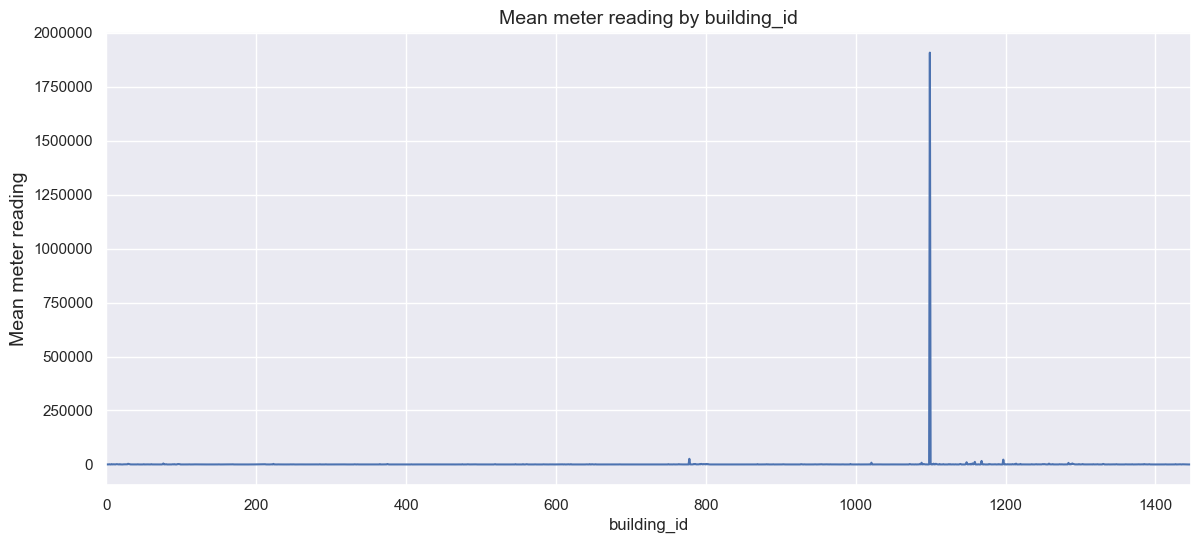

In [33]:
fig, axes = plt.subplots(1,1,figsize=(14, 6))
train.groupby('building_id')['meter_reading'].mean().plot();
axes.set_title('Mean meter reading by building_id', fontsize=14);
axes.set_ylabel('Mean meter reading', fontsize=14);

Text(0, 0.5, 'Meter reading')

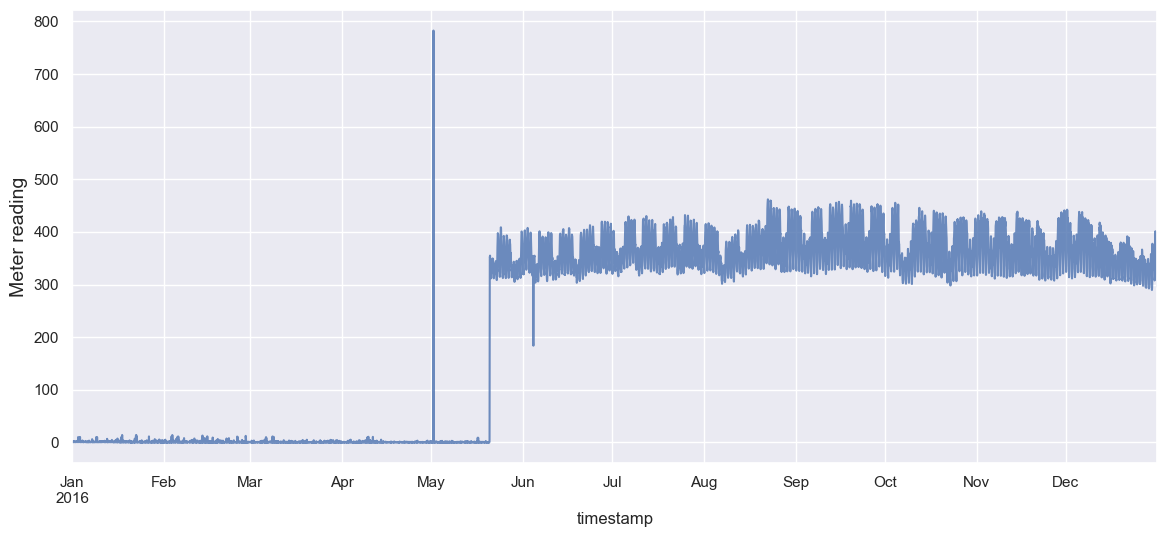

In [52]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6), dpi=100)
drop[['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes, label='By hour', alpha=0.8).set_ylabel('Meter reading', fontsize=14)

In [10]:
building_1099 = train[train["building_id"] == 1099]

In [11]:
building_1099["hour"] = train["timestamp"].dt.hour

In [59]:
building_1099.groupby('meter')

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
1533,1099,0,2016-01-01 00:00:00,282.248,13,Education,332884,NaN,NaN
1534,1099,2,2016-01-01 00:00:00,3241630.000,13,Education,332884,NaN,NaN
3829,1099,0,2016-01-01 01:00:00,282.248,13,Education,332884,NaN,NaN
3830,1099,2,2016-01-01 01:00:00,3241630.000,13,Education,332884,NaN,NaN
6125,1099,0,2016-01-01 02:00:00,284.864,13,Education,332884,NaN,NaN
6126,1099,2,2016-01-01 02:00:00,262584.000,13,Education,332884,NaN,NaN
8424,1099,0,2016-01-01 03:00:00,280.287,13,Education,332884,NaN,NaN
8425,1099,2,2016-01-01 03:00:00,22632.000,13,Education,332884,NaN,NaN
10719,1099,0,2016-01-01 04:00:00,279.975,13,Education,332884,NaN,NaN
10720,1099,2,2016-01-01 04:00:00,160896.000,13,Education,332884,NaN,NaN


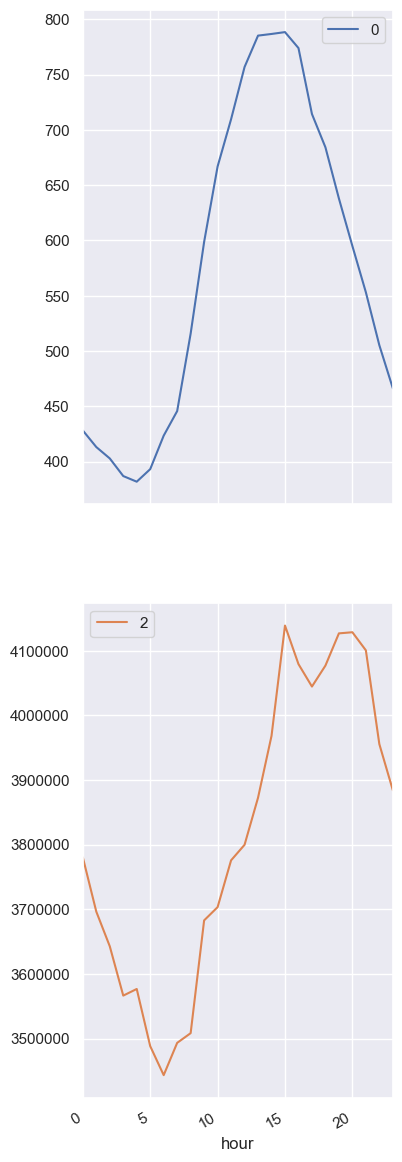

In [78]:
plot = building_1099.groupby(["hour", "meter"])["meter_reading"].mean().unstack().plot(subplots=True, sort_columns=True, figsize=(4,16))

In [15]:
m2 = building_1099[building_1099['meter'] == 2]
m0 = building_1099[building_1099['meter'] == 0]

In [93]:
m0.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,hour
1533,1099,0,2016-01-01 00:00:00,282.248,13,Education,332884,NaN,NaN,0
3829,1099,0,2016-01-01 01:00:00,282.248,13,Education,332884,NaN,NaN,1
6125,1099,0,2016-01-01 02:00:00,284.864,13,Education,332884,NaN,NaN,2
8424,1099,0,2016-01-01 03:00:00,280.287,13,Education,332884,NaN,NaN,3
10719,1099,0,2016-01-01 04:00:00,279.975,13,Education,332884,NaN,NaN,4


In [95]:
m2.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,hour
1534,1099,2,2016-01-01 00:00:00,3241630.0,13,Education,332884,NaN,NaN,0
3830,1099,2,2016-01-01 01:00:00,3241630.0,13,Education,332884,NaN,NaN,1
6126,1099,2,2016-01-01 02:00:00,262584.0,13,Education,332884,NaN,NaN,2
8425,1099,2,2016-01-01 03:00:00,22632.0,13,Education,332884,NaN,NaN,3
10720,1099,2,2016-01-01 04:00:00,160896.0,13,Education,332884,NaN,NaN,4


In [98]:
max(m2.meter_reading)

21904700.0

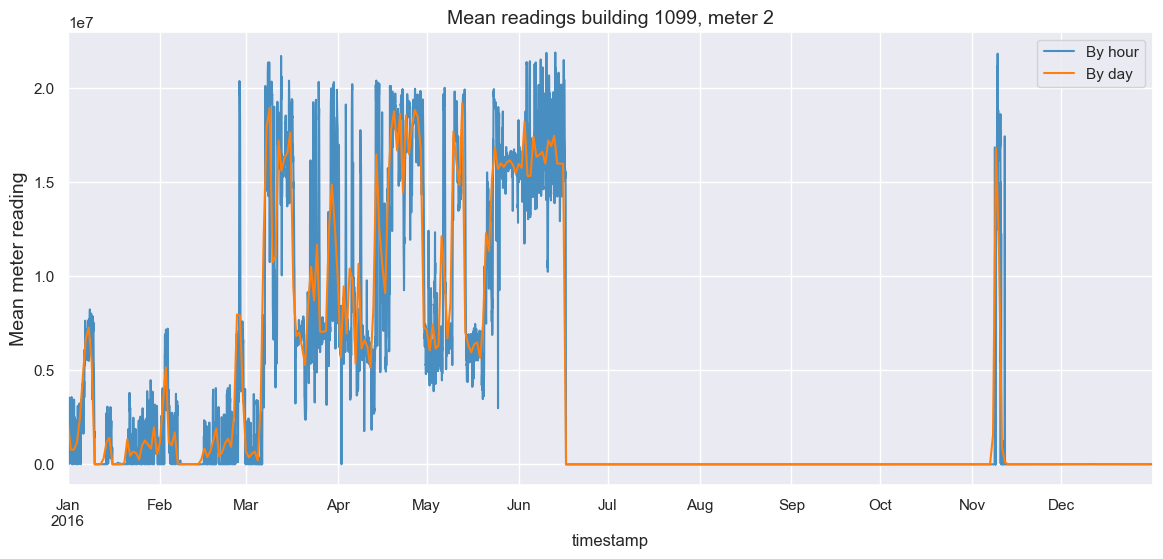

In [26]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6), dpi=100)
m2[['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes, alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=14);
m2[['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes, alpha=1, label='By day', color='tab:orange');
axes.set_title('Mean readings building 1099, meter 2', fontsize=14);
axes.legend();sns.set_style("darkgrid")

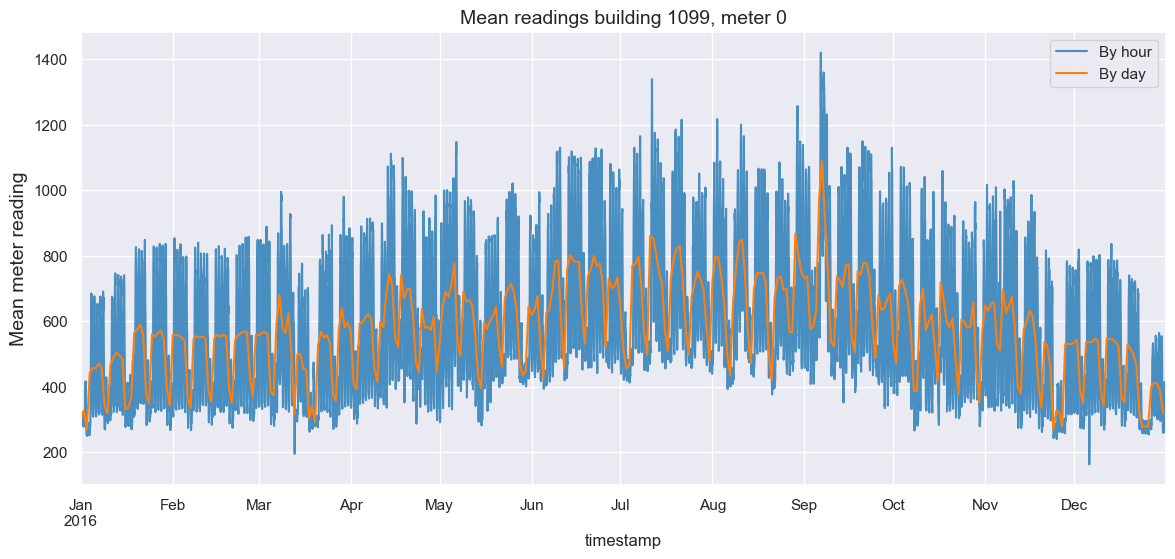

In [106]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6), dpi=100)
m0[['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes, alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=14);
m0[['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes, alpha=1, label='By day', color='tab:orange');
axes.set_title('Mean readings building 1099, meter 0', fontsize=14);
axes.legend();

In [107]:
max(building_1099[building_1099['meter'] == 2]["meter_reading"])

21904700.0

In [108]:
1e7

10000000.0